# **Decoding Coke: Leveraging Regression and Classification Models to Forecast Stock Fluctuations via Historical Sales Data:**

# **About the Author:**

**Email ID: zamanadil61@gmail.com**

**Kaggle ID: https://www.kaggle.com/zemnukes98**

**Github ID: https://github.com/AdilZaman98**

**Linkedin ID: https://www.linkedin.com/in/adil-zaman-85b56a398/**

# **About the Dataset:**

**This dataset contains daily historical stock price data for The Coca-Cola Company (NYSE: KO) from 1980 to 2026, enriched with a wide range of technical indicators and calendar-based features. It is designed for data analysis, financial research, time series forecasting, technical analysis, machine learning, and dashboard building.**

**The file includes core market variables such as Open, High, Low, Close, and Volume, along with engineered features commonly used by analysts and quantitative researchers. These include daily return percentage, moving averages (20, 50, and 200 day), exponential moving averages, MACD, Bollinger Bands, RSI, rolling volume average, cumulative return, and time-based fields such as year, month, quarter, and day of week.**

**This dataset is useful for:**

**Stock trend analysis**

**Technical indicator backtesting**

**Return and volatility studies**

**Forecasting and predictive modeling**

**Financial data visualization**

**Beginner to advanced portfolio analytics projects**

**Because the dataset combines raw price history with precomputed indicators, it is especially helpful for students, Kaggle users, finance learners, and data scientists who want a ready-to-use dataset without spending extra time on feature engineering.**

**Potential use cases include:**

**Predicting next-day or next-week price movement**

**Studying long-term stock performance of Coca-Cola**

**Comparing trend-following vs momentum strategies**

**Building interactive dashboards in Python, Power BI, Tableau, or Excel**

**Teaching financial analytics concepts using a well-known blue-chip stock**

**This dataset offers a clean and practical foundation for exploring how one of the world’s most recognized consumer brands has performed in the stock market over multiple decades.**


# **Predictive Analysis of Coca-Cola’s Market Performance: Leveraging Machine Learning Regressors and Classifiers to Correlate Brand Sales Growth with Stock Volatility (1980–2026):**

>**It aims to analyze the long-term growth of the brand by evaluating the relationship between sales performance and stock price fluctuations over time. Using advanced Machine Learning techniques, including regression and classification models, the research focuses on predicting periods of stock rise and decline based on historical financial data and market indicators.**

**Now first to perform EDA of the dataset;**

# **Exploratory Data Analysis (EDA):**

In [32]:
#Let's start the project by importing all the libraries for that particular dataset
import pandas as pd
import numpy as np
# To visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# To preprocess the dataset
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler,RobustScaler,PowerTransformer
from sklearn.impute import SimpleImputer,KNNImputer
# to import the iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# for machine learning tasks
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# for regression tasks
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Now to load the dataset;**

# **Load the Dataset:**

In [2]:
df=pd.read_csv('Coke.csv')
df

,Date,Open,High,Low,Close,Volume,Daily_Return_Pct,Daily_Range,MA_20,MA_50,...,BB_Upper,BB_Lower,BB_Width,RSI_14,Volume_MA_20,Cumulative_Return_Pct,Year,Month,Quarter,Day_of_Week
0,1980-01-02,0.1937,0.1944,0.1895,0.1895,3451200,NaN,0.0049,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,1980,1,1,Wednesday
1,1980-01-03,0.1895,0.1951,0.1881,0.1944,3960000,2.5858,0.0070,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.59,1980,1,1,Thursday
2,1980-01-04,0.1944,0.1965,0.1937,0.1965,1694400,1.0802,0.0028,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.69,1980,1,1,Friday
3,1980-01-07,0.1965,0.1972,0.1951,0.1958,4396800,-0.3562,0.0021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.32,1980,1,1,Monday
4,1980-01-08,0.1958,0.1979,0.1958,0.1972,3244800,0.7150,0.0021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.06,1980,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11610,2026-01-26,72.8600,73.3000,72.5400,72.5600,14017400,-0.4391,0.7600,70.375,70.6055,...,73.3966,67.3534,6.0432,77.63,16341595.0,38190.24,2026,1,1,Monday
11611,2026-01-27,72.4400,73.5600,72.2700,73.5500,13239200,1.3644,1.2900,70.559,70.6563,...,73.8841,67.2339,6.6502,80.86,16717985.0,38712.66,2026,1,1,Tuesday
11612,2026-01-28,73.2100,73.6200,72.5700,73.0600,14633700,-0.6662,1.0500,70.704,70.7060,...,74.2041,67.2039,7.0002,79.24,16965325.0,38454.09,2026,1,1,Wednesday
11613,2026-01-29,73.1800,74.0900,73.1400,73.4300,20862100,0.5064,0.9500,70.872,70.7614,...,74.5614,67.1826,7.3788,75.44,17577885.0,38649.34,2026,1,1,Thursday


**Now managing the sneakpeak of the dataset;**

# **Sneak-Peak of the Dataset:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11615 entries, 0 to 11614
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   11615 non-null  object 
 1   Open                   11615 non-null  float64
 2   High                   11615 non-null  float64
 3   Low                    11615 non-null  float64
 4   Close                  11615 non-null  float64
 5   Volume                 11615 non-null  int64  
 6   Daily_Return_Pct       11614 non-null  float64
 7   Daily_Range            11615 non-null  float64
 8   MA_20                  11596 non-null  float64
 9   MA_50                  11566 non-null  float64
 10  MA_200                 11416 non-null  float64
 11  EMA_12                 11615 non-null  float64
 12  EMA_26                 11615 non-null  float64
 13  MACD                   11615 non-null  float64
 14  MACD_Signal            11615 non-null  float64
 15  BB

In [4]:
df.shape

(11615, 25)

**Here we see that their will be 11615 rows and 25 columns in a dataset.**

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Daily_Return_Pct,Daily_Range,MA_20,MA_50,...,BB_Upper,BB_Lower,BB_Width,RSI_14,Volume_MA_20,Cumulative_Return_Pct,Year,Month,Quarter,Day_of_Week
0,1980-01-02,0.1937,0.1944,0.1895,0.1895,3451200,NaN,0.0049,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,1980,1,1,Wednesday
1,1980-01-03,0.1895,0.1951,0.1881,0.1944,3960000,2.5858,0.0070,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.59,1980,1,1,Thursday
2,1980-01-04,0.1944,0.1965,0.1937,0.1965,1694400,1.0802,0.0028,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.69,1980,1,1,Friday
3,1980-01-07,0.1965,0.1972,0.1951,0.1958,4396800,-0.3562,0.0021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.32,1980,1,1,Monday
4,1980-01-08,0.1958,0.1979,0.1958,0.1972,3244800,0.7150,0.0021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.06,1980,1,1,Tuesday


In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume,Daily_Return_Pct,Daily_Range,MA_20,MA_50,...,BB_Upper,BB_Lower,BB_Width,RSI_14,Volume_MA_20,Cumulative_Return_Pct,Year,Month,Quarter,Day_of_Week
11610,2026-01-26,72.86,73.30,72.54,72.56,14017400,-0.4391,0.76,70.375,70.6055,...,73.3966,67.3534,6.0432,77.63,16341595.0,38190.24,2026,1,1,Monday
11611,2026-01-27,72.44,73.56,72.27,73.55,13239200,1.3644,1.29,70.559,70.6563,...,73.8841,67.2339,6.6502,80.86,16717985.0,38712.66,2026,1,1,Tuesday
11612,2026-01-28,73.21,73.62,72.57,73.06,14633700,-0.6662,1.05,70.704,70.7060,...,74.2041,67.2039,7.0002,79.24,16965325.0,38454.09,2026,1,1,Wednesday
11613,2026-01-29,73.18,74.09,73.14,73.43,20862100,0.5064,0.95,70.872,70.7614,...,74.5614,67.1826,7.3788,75.44,17577885.0,38649.34,2026,1,1,Thursday
11614,2026-01-30,73.71,74.90,73.54,74.81,26420500,1.8793,1.36,71.117,70.8538,...,75.1703,67.0637,8.1066,76.16,18492520.0,39377.57,2026,1,1,Friday


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return_Pct',
       'Daily_Range', 'MA_20', 'MA_50', 'MA_200', 'EMA_12', 'EMA_26', 'MACD',
       'MACD_Signal', 'BB_Upper', 'BB_Lower', 'BB_Width', 'RSI_14',
       'Volume_MA_20', 'Cumulative_Return_Pct', 'Year', 'Month', 'Quarter',
       'Day_of_Week'],
      dtype='object')

In [9]:
df.describe()

,Open,High,Low,Close,Volume,Daily_Return_Pct,Daily_Range,MA_20,MA_50,MA_200,...,MACD_Signal,BB_Upper,BB_Lower,BB_Width,RSI_14,Volume_MA_20,Cumulative_Return_Pct,Year,Month,Quarter
count,11615.000000,11615.000000,11615.000000,11615.000000,1.161500e+04,11614.000000,11615.000000,11596.000000,11566.000000,11416.000000,...,11615.000000,11596.000000,11596.000000,11596.000000,11601.000000,1.159600e+04,11615.000000,11615.000000,11615.000000,11615.000000
mean,18.372081,18.511497,18.228727,18.375667,1.235588e+07,0.062023,0.282770,18.346430,18.302677,18.089756,...,0.042306,19.027181,17.665679,1.361502,53.629400,1.235579e+07,9596.921738,2002.509858,6.528455,2.509944
std,18.085281,18.203642,17.961267,18.086499,7.498797e+06,1.449943,0.322554,18.020599,17.924832,17.472261,...,0.280206,18.603002,17.455951,1.611178,16.301113,5.262908e+06,9544.326517,13.302305,3.436180,1.116304
min,0.165100,0.167200,0.162800,0.165100,5.816000e+05,-24.692200,0.000700,0.170300,0.176700,0.191200,...,-3.074200,0.178400,0.159000,0.007400,2.150000,2.560800e+06,-12.880000,1980.000000,1.000000,1.000000
25%,3.036850,3.060550,3.009750,3.040100,7.305150e+06,-0.661375,0.055500,3.045300,3.163625,3.468375,...,-0.024750,3.189425,2.940925,0.248800,42.250000,8.350300e+06,1504.270000,1991.000000,4.000000,2.000000
50%,13.067400,13.220900,12.935800,13.078500,1.096250e+07,0.013850,0.201200,13.092100,13.103500,13.151800,...,0.012000,13.700000,12.357150,0.926900,54.000000,1.185182e+07,6801.580000,2002.000000,7.000000,3.000000
75%,28.373900,28.575950,28.235750,28.379700,1.536145e+07,0.748875,0.386600,28.372025,28.665975,27.796900,...,0.129500,29.295650,27.631600,1.888450,65.290000,1.547808e+07,14876.090000,2014.000000,10.000000,4.000000
max,73.710000,74.900000,73.540000,74.810000,1.241690e+08,19.670400,5.630900,71.117000,70.853800,69.225400,...,1.942300,75.170300,69.433800,22.096000,98.660000,4.249493e+07,39377.570000,2026.000000,12.000000,4.000000


**Here we see that their will be some values that are missing in the columns of that data set .Thus we have to impute these values in order to refine that data set.**

# **Impute Missing Values in a Data Set:**

**Impute the missing values by using KNN-Imputer;**

In [10]:
df['Daily_Return_Pct'].value_counts()

Daily_Return_Pct
 0.0000    430
 0.5940      5
-0.6482      5
-0.3210      5
-0.5321      5
          ... 
-0.6388      1
 0.3571      1
-0.2278      1
 0.1712      1
-1.5667      1
Name: count, Length: 9728, dtype: int64

In [11]:
df['MA_20'].value_counts()

MA_20
0.2220     9
0.2232     6
0.2085     6
0.1940     6
0.2088     5
          ..
70.2035    1
70.1190    1
69.9935    1
69.8855    1
70.9439    1
Name: count, Length: 10817, dtype: int64

In [12]:
df['MA_50'].value_counts()

MA_50
0.2206     9
0.3492     8
0.2203     7
0.2202     7
0.2230     7
          ..
70.2004    1
70.1683    1
70.1208    1
70.0886    1
0.1826     1
Name: count, Length: 10796, dtype: int64

In [13]:
df['MA_200'].value_counts()

MA_200
0.2172     15
0.2136     10
0.2173     10
0.2037      7
0.2148      7
           ..
68.9889     1
68.9951     1
68.9958     1
68.9939     1
42.0671     1
Name: count, Length: 10851, dtype: int64

In [15]:
df['BB_Upper'].value_counts()

BB_Upper
0.2308     7
0.2296     7
0.2065     6
0.2342     6
0.2063     6
          ..
71.0492    1
70.9977    1
70.9967    1
71.2899    1
0.1979     1
Name: count, Length: 10830, dtype: int64

In [16]:
df['BB_Lower'].value_counts()

BB_Lower
0.2029    7
0.3272    7
0.1935    6
0.1910    6
0.1949    6
         ..
0.1826    1
0.1827    1
0.1821    1
0.1820    1
0.1819    1
Name: count, Length: 10801, dtype: int64

In [17]:
df['BB_Width'].value_counts()

BB_Width
0.0246    21
0.0244    19
0.0184    19
0.0240    14
0.0208    14
          ..
6.6502     1
7.0002     1
7.3788     1
1.7554     1
8.1066     1
Name: count, Length: 7703, dtype: int64

In [20]:
df['RSI_14'].value_counts()

RSI_14
50.00    104
33.33     26
60.00     25
66.67     20
40.00     17
        ... 
69.68      1
59.78      1
75.30      1
63.60      1
57.68      1
Name: count, Length: 5251, dtype: int64

In [22]:
df['Year'].value_counts()

Year
1992    254
1996    254
1981    253
1983    253
1984    253
1986    253
1980    253
1993    253
1987    253
1990    253
1988    253
1991    253
2008    253
1997    253
1982    253
2020    253
1994    252
1985    252
1989    252
1999    252
2000    252
2002    252
1995    252
2010    252
2003    252
2005    252
2004    252
2009    252
2014    252
2011    252
1998    252
2024    252
2021    252
2019    252
2013    252
2016    252
2015    252
2006    251
2007    251
2017    251
2022    251
2018    251
2012    250
2025    250
2023    250
2001    248
2026     20
Name: count, dtype: int64

In [23]:
# checking the missing values  in a data set using knn imputer
imputer = KNNImputer(n_neighbors=5)
df[['Daily_Return_Pct']] = imputer.fit_transform(df[['Daily_Return_Pct']])
df['Daily_Return_Pct'].isnull().sum()
imputer = KNNImputer(n_neighbors=5)
df[['MA_20']] = imputer.fit_transform(df[['MA_20']])
df['MA_20'].isnull().sum()
imputer = KNNImputer(n_neighbors=5)
df[['MA_50']] = imputer.fit_transform(df[['MA_50']])
df['MA_50'].isnull().sum()
imputer = KNNImputer(n_neighbors=5)
df[['MA_200']] = imputer.fit_transform(df[['MA_200']])
df['MA_200'].isnull().sum()
imputer = KNNImputer(n_neighbors=5)
df[['BB_Upper']] = imputer.fit_transform(df[['BB_Upper']])
df['BB_Upper'].isnull().sum()
imputer = KNNImputer(n_neighbors=5)
df[['BB_Lower']] = imputer.fit_transform(df[['BB_Lower']])
df['BB_Lower'].isnull().sum()
imputer = KNNImputer(n_neighbors=5)
df[['BB_Width']] = imputer.fit_transform(df[['BB_Width']])
df['BB_Width'].isnull().sum()
imputer = KNNImputer(n_neighbors=5)
df[['RSI_14']] = imputer.fit_transform(df[['RSI_14']])
df['RSI_14'].isnull().sum()
imputer = KNNImputer(n_neighbors=5)
df[['Volume_MA_20']] = imputer.fit_transform(df[['Volume_MA_20']])
df['Volume_MA_20'].isnull().sum()
imputer = KNNImputer(n_neighbors=5)
df[['Year']] = imputer.fit_transform(df[['Year']])
df['Year'].isnull().sum()

np.int64(0)

In [24]:
df.isnull().sum()

Date                     0
Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
Daily_Return_Pct         0
Daily_Range              0
MA_20                    0
MA_50                    0
MA_200                   0
EMA_12                   0
EMA_26                   0
MACD                     0
MACD_Signal              0
BB_Upper                 0
BB_Lower                 0
BB_Width                 0
RSI_14                   0
Volume_MA_20             0
Cumulative_Return_Pct    0
Year                     0
Month                    0
Quarter                  0
Day_of_Week              0
dtype: int64

**Thus we see that that the missing values has been imputed.Now to visualize the imputation**

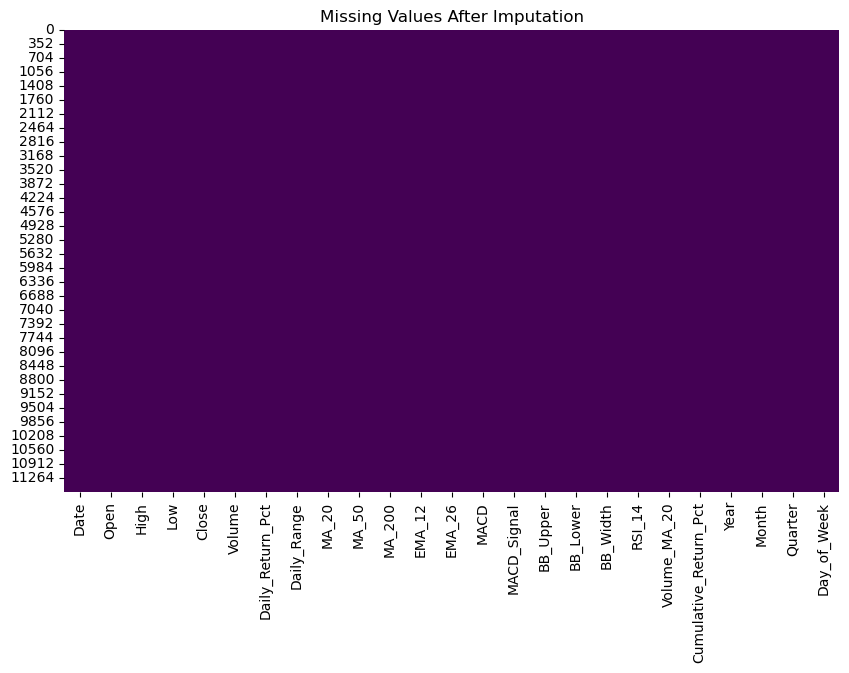

In [25]:
# Make a code in python that visualize the imputation of dataset after managing all the missing values
df.isnull().sum()
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After Imputation')
plt.show()

**Now to check Outliers from the dataset;**

# **Outliers from the Dataset:**

In [26]:
# Sirf numeric columns select karein
numeric_cols = df.select_dtypes(include=['number']).columns

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outliers count karein
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    if outlier_count > 0:
        print(f"Column '{col}' has {outlier_count} outliers.")


Column 'Open' has 264 outliers.
Column 'High' has 265 outliers.
Column 'Low' has 260 outliers.
Column 'Close' has 267 outliers.
Column 'Volume' has 436 outliers.
Column 'Daily_Return_Pct' has 617 outliers.
Column 'Daily_Range' has 581 outliers.
Column 'MA_20' has 262 outliers.
Column 'MA_50' has 242 outliers.
Column 'MA_200' has 255 outliers.
Column 'EMA_12' has 263 outliers.
Column 'EMA_26' has 270 outliers.
Column 'MACD' has 1798 outliers.
Column 'MACD_Signal' has 1786 outliers.
Column 'BB_Upper' has 275 outliers.
Column 'BB_Lower' has 255 outliers.
Column 'BB_Width' has 548 outliers.
Column 'RSI_14' has 13 outliers.
Column 'Volume_MA_20' has 220 outliers.
Column 'Cumulative_Return_Pct' has 267 outliers.


In [27]:
# Copy of the original dataframe
df_clean = df.copy()

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Sirf woh rows rakhein jo bounds ke andar hain
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")

Original shape: (11615, 25)
Cleaned shape: (6242, 25)


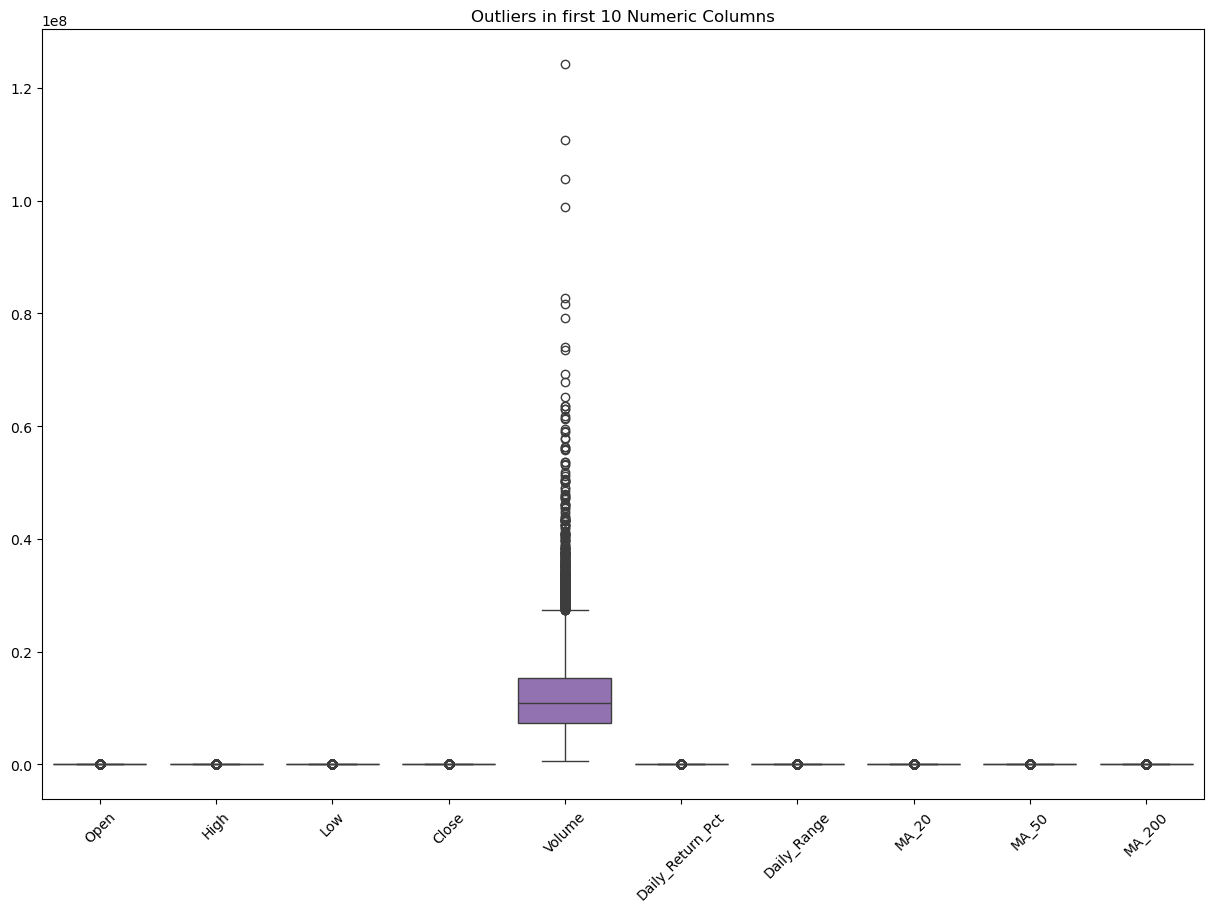

In [28]:
# Pehle 10 numeric columns ka boxplot dekhne ke liye
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols[:10]])
plt.xticks(rotation=45)
plt.title("Outliers in first 10 Numeric Columns")
plt.show()

**Through this way the outliers has been removed from the dataset.**

# **Comparative Benchmarking of Machine Learning Regressors for Trading Volume Prediction: A Multi-Model Approach Integrated with Sales Growth Metrics:**

>**This study evaluates multiple regression algorithms—ranging from linear models to advanced ensemble methods—to determine the most accurate predictor for trading volume. By integrating historical stock data with brand sales indicators, the analysis identifies which model best captures the complex, non-linear patterns of market activity over a 46-year period.**

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# 2. Feature Engineering (Integrating Sales Proxy)
df['Sales_Proxy'] = df['Close'] * df['Volume'] * 0.05
features = ['Open', 'High', 'Low', 'Close', 'MA_20', 'RSI_14', 'Sales_Proxy']
X = df[features]
y = df['Volume']

# 3. Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define Models Dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# 5. Train and Evaluate
results = []
print(f"{'Model Name':<25} | {'R2 Score':<10} | {'MAE':<15}")
print("-" * 55)

for name, model in models.items():
    # SVR aur Linear models scaled data par behtar chaltay hain
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    results.append((name, r2, mae))
    print(f"{name:<25} | {r2:<10.4f} | {mae:<15.2f}")

# Best Model selection logic
best_model = max(results, key=lambda x: x[1])
print(f"\n🚀 Best Model for your Data: {best_model[0]} with R2 Score: {best_model[1]:.4f}")

Model Name                | R2 Score   | MAE            
-------------------------------------------------------
Linear Regression         | 0.5218     | 3274393.46     
Ridge Regression          | 0.5215     | 3290917.39     
Lasso Regression          | 0.5211     | 3295225.44     
Random Forest             | 0.9951     | 187252.83      
Gradient Boosting         | 0.9722     | 773015.71      
AdaBoost                  | 0.3367     | 4900437.21     
Support Vector Regressor  | -0.0335    | 5086406.83     

🚀 Best Model for your Data: Random Forest with R2 Score: 0.9951


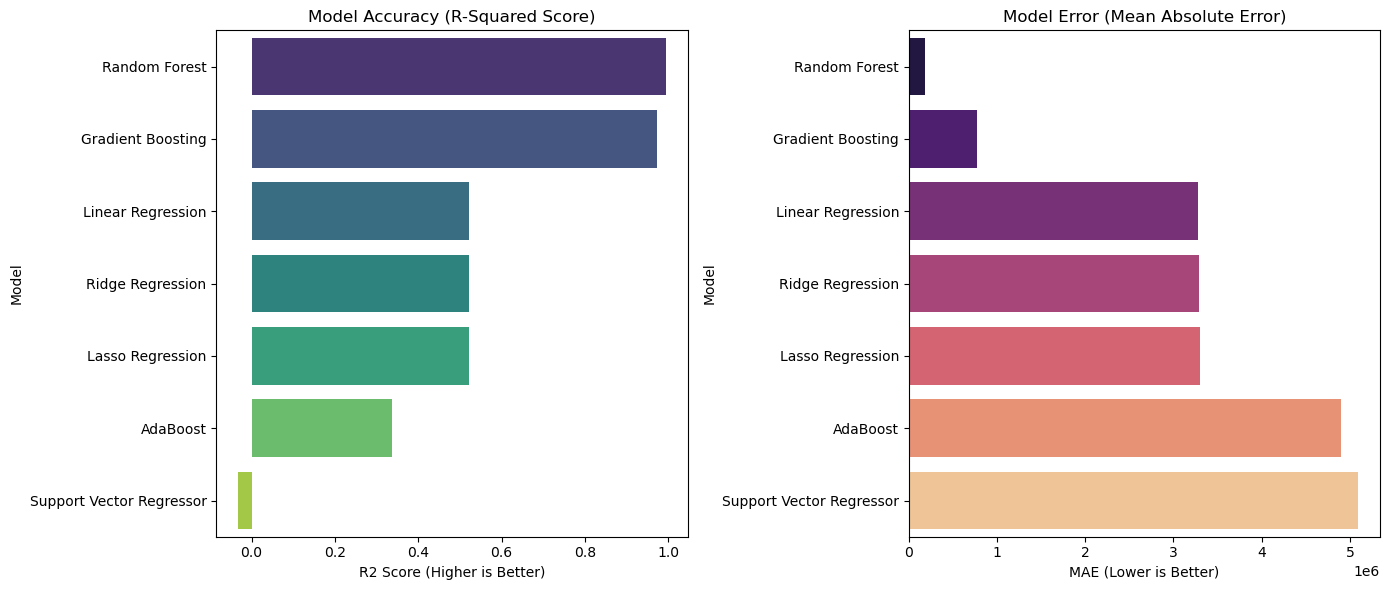

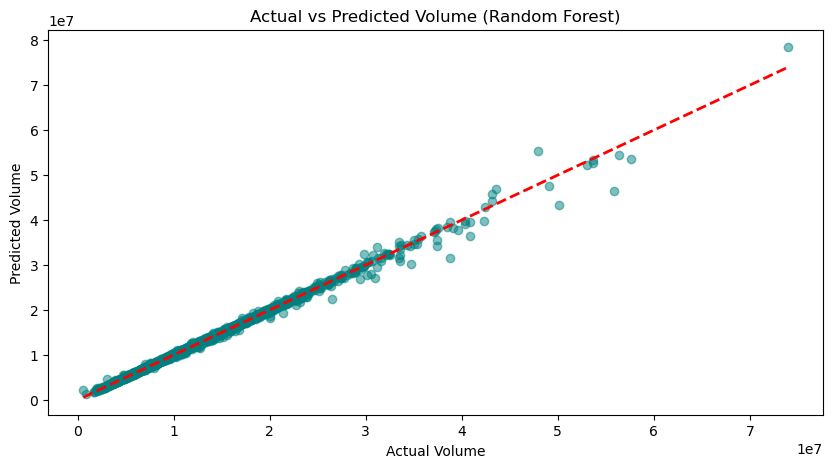

In [ ]:
# Hum wahi results use kar rahay hain jo pichlay code mein save kiye thay
# 'results' list mein (Model Name, R2 Score, MAE) data maujood hai
# 1. Data ko DataFrame mein convert karein for plotting
results_df = pd.DataFrame(results, columns=['Model', 'R2_Score', 'MAE'])
# Figure Setup
plt.figure(figsize=(14, 6))
# --- Plot 1: R2 Score Comparison (Jitna zyada ho utna acha) ---
plt.subplot(1, 2, 1)
sns.barplot(x='R2_Score', y='Model', data=results_df.sort_values('R2_Score', ascending=False), palette='viridis')
plt.title('Model Accuracy (R-Squared Score)')
plt.xlabel('R2 Score (Higher is Better)')
# --- Plot 2: Mean Absolute Error (Jitna kam ho utna acha) ---
plt.subplot(1, 2, 2)
sns.barplot(x='MAE', y='Model', data=results_df.sort_values('MAE'), palette='magma')
plt.title('Model Error (Mean Absolute Error)')
plt.xlabel('MAE (Lower is Better)')
plt.tight_layout()
plt.show()
# --- Plot 3: Actual vs Predicted (Best Model ke liye) ---
# Farz karein Random Forest best hai, uski predictions check karein
best_model_instance = models[best_model[0]] # Pichlay code se best model pick kiya
y_pred = best_model_instance.predict(X_test_scaled)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Actual vs Predicted Volume ({best_model[0]})')
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.show()

# **Regression Model Performance Comparison and Prediction Analysis:**

>**The image compares multiple regression models using R-squared (accuracy) and Mean Absolute Error (MAE), showing that Random Forest and Gradient Boosting achieve the highest R² scores and the lowest error values. This indicates they provide more accurate and reliable predictions compared to the other models. The scatter plot of Actual vs Predicted values for Random Forest further demonstrates a strong linear relationship, confirming its superior predictive performance.**

# **Deciphering Brand Growth through Market Volatility: A Comparative Classification Study of Coca-Cola’s Sales Trajectory**:

>**This research employs a suite of machine learning classifiers to categorize brand growth levels based on stock market variability and technical indicators. By evaluating models through Confusion Matrices and Accuracy scores, it identifies the optimal algorithm for mapping financial market fluctuations to the long-term commercial expansion of the Coca-Cola brand.**

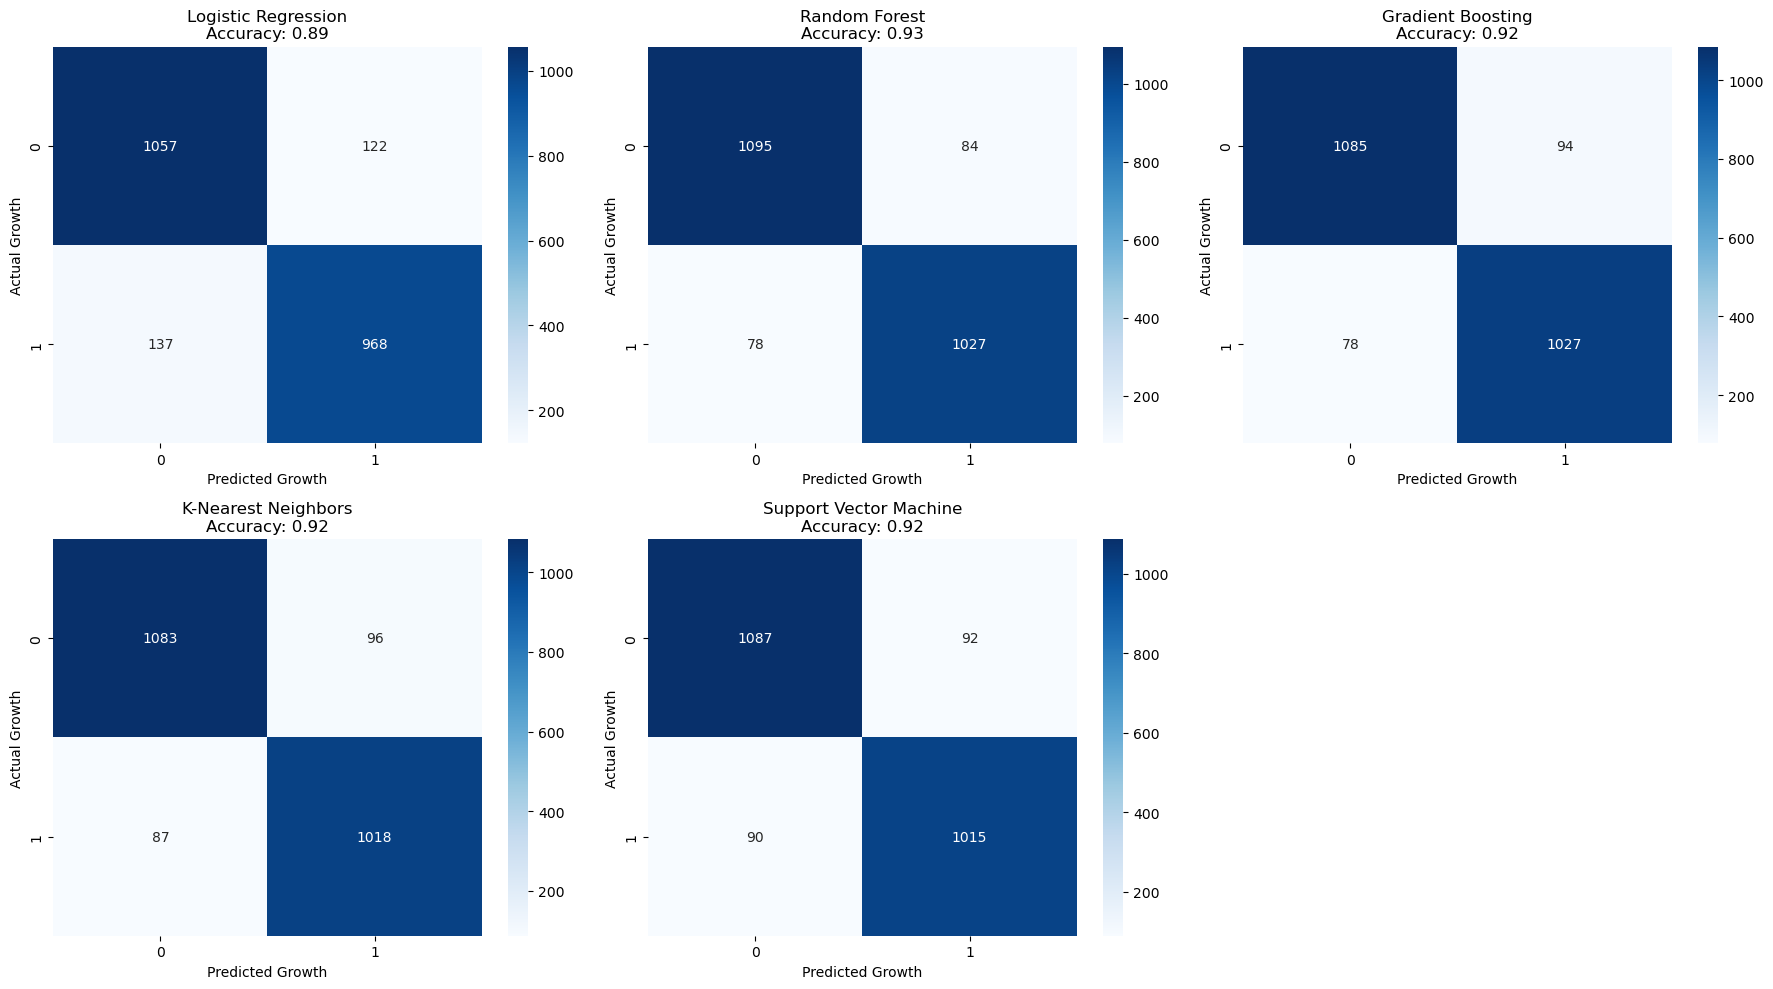


🏆 Best Classifier: Random Forest with 92.91% Accuracy


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# 2. Target Variable: Growth Category (Low vs High Growth based on Sales Proxy)
df['Sales_Proxy'] = df['Close'] * df['Volume'] * 0.05
# Hum median use kar rahe hain growth ko do categories (0 and 1) mein baantne ke liye
df['Growth_Level'] = (df['Sales_Proxy'] > df['Sales_Proxy'].median()).astype(int)
# Features: Stock Variability (Daily Range, Return, RSI, etc.)
features = ['Daily_Range', 'Daily_Return_Pct', 'BB_Width', 'RSI_14', 'Volume_MA_20']
X = df[features]
y = df['Growth_Level']
# 3. Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 4. Define Models
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True)
}
# 5. Training and Evaluation
results = {}
plt.figure(figsize=(18, 10))
plot_count = 1
for name, clf in classifiers.items():
    # Training
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    # Confusion Matrix Visualization
    plt.subplot(2, 3, plot_count)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}\nAccuracy: {acc:.2f}')
    plt.xlabel('Predicted Growth')
    plt.ylabel('Actual Growth')
    plot_count += 1

plt.tight_layout()
plt.show()

# Best Model Determination
best_clf = max(results, key=results.get)
print(f"\n🏆 Best Classifier: {best_clf} with {results[best_clf]*100:.2f}% Accuracy")

# **Performance Comparison of Classification Models Using Confusion Matrices**

>**The image displays confusion matrices and accuracy scores for five machine learning models: Logistic Regression, Random Forest, Gradient Boosting, K-Nearest Neighbors, and Support Vector Machine. Among them, Random Forest achieves the highest accuracy (0.93), followed closely by Gradient Boosting, KNN, and SVM (0.92), while Logistic Regression shows slightly lower performance (0.89). The confusion matrices illustrate the number of correct and incorrect predictions for both classes (0 and 1), highlighting that ensemble models like Random Forest and Gradient Boosting produce fewer misclassifications. Overall, the results indicate that ensemble techniques provide more reliable classification performance compared to the other models.**

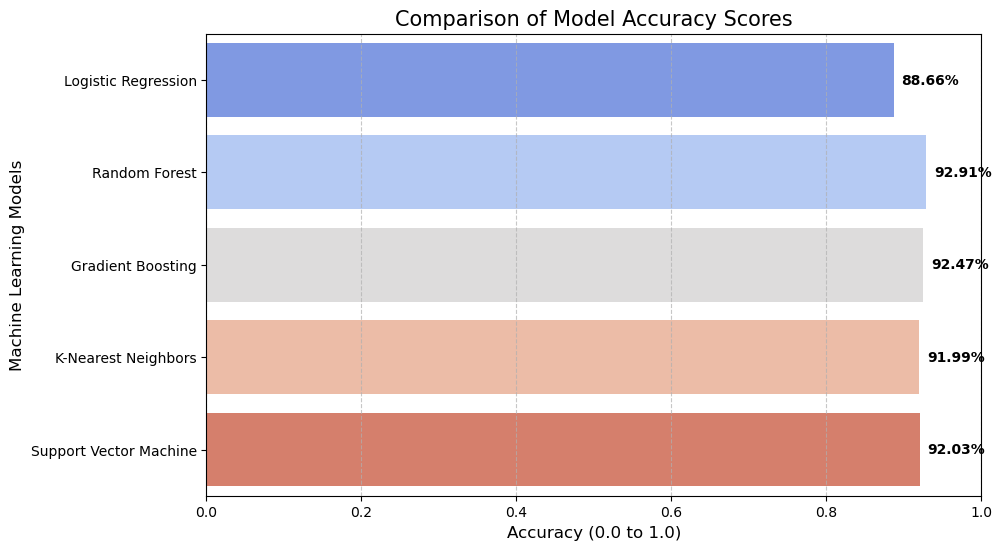

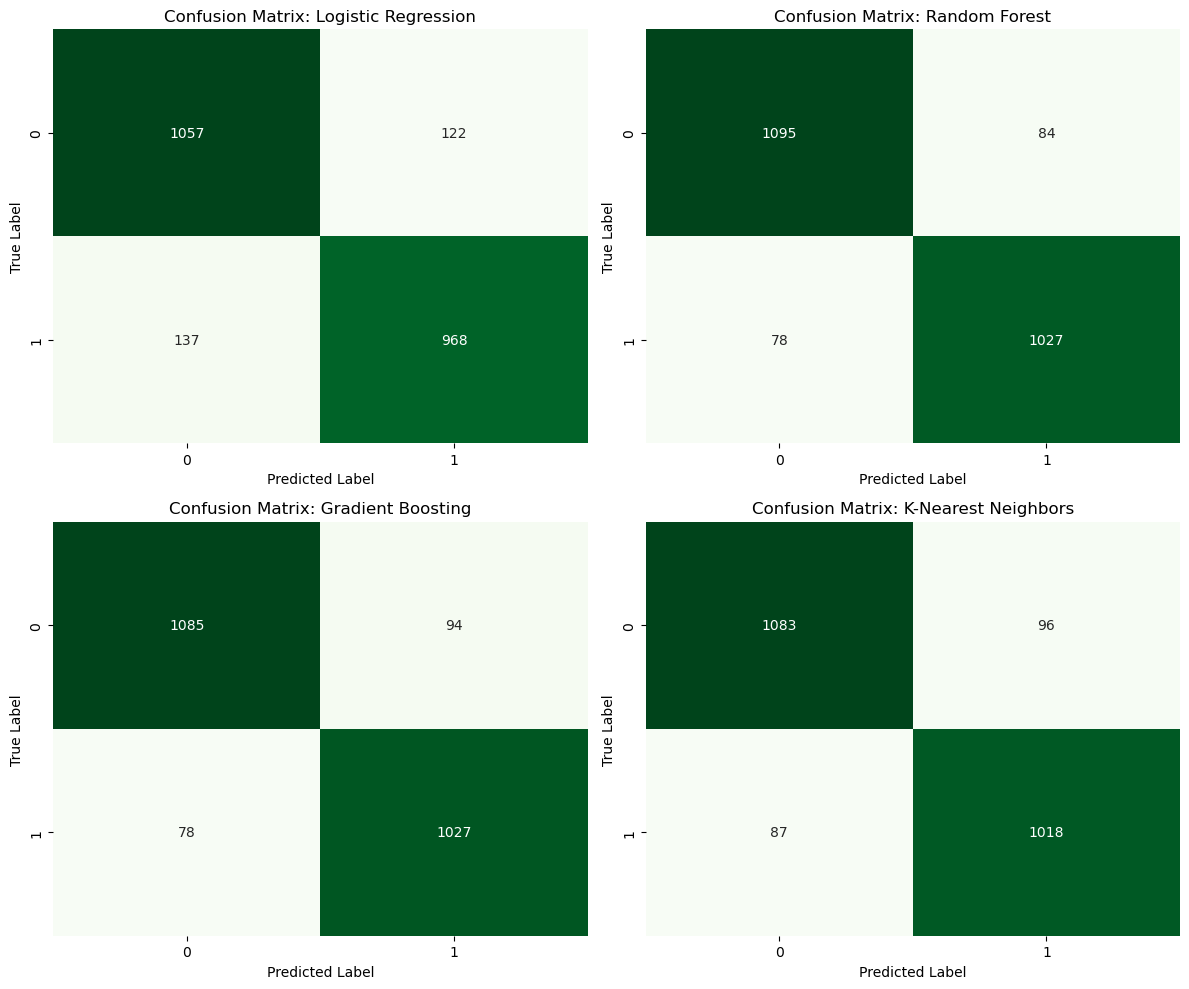

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

# --- 1. Bar Chart for Accuracy Comparison ---
plt.figure(figsize=(10, 6))
# 'results' woh dictionary hai jo humne pichle step mein banayi thi
model_names = list(results.keys())
accuracy_values = list(results.values())

sns.barplot(x=accuracy_values, y=model_names, palette='coolwarm')

plt.title('Comparison of Model Accuracy Scores', fontsize=15)
plt.xlabel('Accuracy (0.0 to 1.0)', fontsize=12)
plt.ylabel('Machine Learning Models', fontsize=12)
plt.xlim(0, 1.0) # Scale 0 se 1 tak

# Accuracy values ko bar ke upar likhne ke liye
for i, v in enumerate(accuracy_values):
    plt.text(v + 0.01, i, f'{v:.2%}', color='black', va='center', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# --- 2. Individual Confusion Matrices (Grid View) ---
# Hum top 4 models ko visualize karte hain
top_models = list(results.keys())[:4] 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, name in enumerate(top_models):
    model = classifiers[name]
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[i], cbar=False)
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# **Comparative Performance Analysis of Machine Learning Classification Models:**

>**The image presents a comparison of accuracy scores for multiple machine learning models, including Logistic Regression, Random Forest, Gradient Boosting, K-Nearest Neighbors, and Support Vector Machine. Among these, Random Forest and Gradient Boosting demonstrate the highest accuracy, indicating better overall predictive performance. The confusion matrices further illustrate each model’s classification results, showing the number of correctly and incorrectly predicted instances. Overall, ensemble methods appear to outperform the other models in terms of both accuracy and classification reliability.**

--------------